# Business case

**Business case:**  John the ceo of the winery located in Vilafranca del Penedès wine company was really happy with the results regarding red wine. 

    "He has contacted us again because he wants to repeat the same procedure but, in that case for the white wines varieties that he has.
    
    
> dataset: Ex3.2.winequality-white.csv

# Kindly reminder of the business case (`3.3.1.2.Linear-regression-on-RED-wine.ipynb`)

      John has to perform a lot of measurements (analysis) to each variety of wine. Among the measurements, the one related to Density which is extremely slow: it takes more than one day per sample! He has contacted us because he wants to know whether it could be possible to build a mathematical model in order to quantify this specific variable on new samples, considering other features from each wine. Building a model that may fit his interest will have important consecuencies for his business: he will save time, and MONEY!
      
      
      
**Key information:**
- `fixed acidity`: information regarding tartaric acid content (g / dm^3),most acids involved with wine or fixed or nonvolatile (do not evaporate readily). Range  [1- 30]
- `volatile acidity`: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. Range [0-2]
- `citric acid`:found in small quantities, citric acid can add ‘freshness’ and flavor to wines. Range [0-1]
- `residual sugar`:the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet. Range [0-20]
- `chlorides`: the amount of salt in the wine. Range [0-500]
- `free sulfur dioxide`: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. Range [0-750]
- `total sulfur dioxide`:amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. Range [0-250]
- `water_cont`:content of water in the wine. Range [0-100]
- `pH`:describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale. Range [0-14]
- `sulphates`:a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. Range [0-5]
- `alcohol`:the percent alcohol content of the wine. Range [5-20]
- `quality`:quality of the wines based on sensory analysis. Range [1-10]
- `density`:the density of water is close to that of water depending on the percent alcohol and sugar content. Range [1-100]

In [1]:
# Use the csv: Ex3.2.winequality-white.csv to perform this analysis. 
# Remember that you should do an EDA of the data, it might contain NAN, outliers etc...
# Clue: Use linear and multilinear regression to help John 

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

# Modelling Helpers :
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Scaling library 
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler 

# Metrics - Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno


In [58]:
import sys
sys.path.insert(0, './_functions_')

from Functions_EDA import *
from fx_MLRegression import *
from fx_MLClassification import *

In [59]:
# df = pd.read_csv('Ex3.2.winequality-white.csv', decimal= ",", sep=";") 
df = pd.read_csv('Ex3.2.winequality-white.csv', delimiter=';', decimal=',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
0,7.02,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3,10
1,6.02,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3,12
2,7.02,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3,14
3,7.02,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3,13
4,6.02,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3,11


# Data Cleaning

## Checking missing values

In [60]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
water_cont              0
pH                      0
sulphates               0
alcohol                 0
quality                 0
density                 0
dtype: int64

In [61]:
percentage_nullValues(df)

,Percentage_NaN
fixed acidity,0.0
volatile acidity,0.0
citric acid,0.0
residual sugar,0.0
chlorides,0.0
free sulfur dioxide,0.0
total sulfur dioxide,0.0
water_cont,0.0
pH,0.0
sulphates,0.0


--> There is no missing values

## Checking duplicated observations

In [62]:
df[df.duplicated()==True]
df.duplicated().sum()

56

In [63]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

--> Duplicated observations have been deleted

## Checking data type of variables

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4842 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4842 non-null   float64
 1   volatile acidity      4842 non-null   float64
 2   citric acid           4842 non-null   float64
 3   residual sugar        4842 non-null   float64
 4   chlorides             4842 non-null   float64
 5   free sulfur dioxide   4842 non-null   float64
 6   total sulfur dioxide  4842 non-null   float64
 7   water_cont            4842 non-null   float64
 8   pH                    4842 non-null   float64
 9   sulphates             4842 non-null   float64
 10  alcohol               4842 non-null   float64
 11  quality               4842 non-null   int64  
 12  density               4842 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 529.6 KB


There is no object type which requires "data encoding"

In [65]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
0,7.02,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3,10
1,6.02,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3,12


## Checking the range of each column

In [66]:
wine_range = {'fixed acidity' : [1,30],
                    'volatile acidity':[0,2],
                    'citric acid' : [0,1],
                    'residual sugar': [0,20],
                    'chlorides' : [0,500],
                    'free sulfur dioxide' :  [0,750],
                    'total sulfur dioxide' : [0,250],
                    'water_cont' : [0,100],
                    'pH' : [0,14],
                    'sulphates':[0,5],
                    'alcohol':[5,20],
                    'quality' : [1,10],
                    'density' : [1,100]}
wine_range = pd.DataFrame(wine_range)
wine_range.index = ['min', 'max']
wine_range

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
min,1,0,0,0,0,0,0,0,0,0,5,1,1
max,30,2,1,20,500,750,250,100,14,5,20,10,100


In [67]:
real_range = df.describe()

real_range.drop(['count', 'mean', 'std', '25%', '50%', '75%'], axis=0, inplace=True)
real_range 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
min,6.02,0.08,0.0,0.6,0.009,2.0,9.0,0.98711,2.72,0.22,8.0,3.0,10.0
max,32.02,1.10,999.0,999.0,0.346,289.0,999.0,1.03898,3.82,9999.00,14.2,9.0,55.0


In [68]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'water_cont', 'pH', 'sulphates', 'alcohol', 'quality', 'density'],
      dtype='object')

자동화!!!!!!

In [69]:
df = df[df['fixed acidity'] <= 30]
df['fixed acidity'].max()

28.02

In [70]:
df = df[df['citric acid'] <= 1]
df['citric acid'].max()

1.0

In [71]:
df = df[df['residual sugar'] <= 20]
df['residual sugar'].max()

19.95

In [72]:
df = df[df['total sulfur dioxide'] <= 250]
df['total sulfur dioxide'].max()

249.5

In [73]:
df = df[df['sulphates'] <= 5]
df['sulphates'].max()

1.08

## Outliers

In [74]:
for i in df:
    df_clean = outlier_treatment(df,i)

Shape of the raw data: (4793, 13)
..................
Shape of the cleaned data: (4793, 13)
Shape of the raw data: (4793, 13)
..................
Shape of the cleaned data: (4614, 13)
Shape of the raw data: (4793, 13)
..................
Shape of the cleaned data: (4529, 13)
Shape of the raw data: (4793, 13)
..................
Shape of the cleaned data: (4793, 13)
Shape of the raw data: (4793, 13)
..................
Shape of the cleaned data: (4590, 13)
Shape of the raw data: (4793, 13)
..................
Shape of the cleaned data: (4748, 13)
Shape of the raw data: (4793, 13)
..................
Shape of the cleaned data: (4787, 13)
Shape of the raw data: (4793, 13)
..................
Shape of the cleaned data: (4793, 13)
Shape of the raw data: (4793, 13)
..................
Shape of the cleaned data: (4718, 13)
Shape of the raw data: (4793, 13)
..................
Shape of the cleaned data: (4669, 13)
Shape of the raw data: (4793, 13)
..................
Shape of the cleaned data: (4793, 13)

In [75]:
df.shape # before removing outliers

(4793, 13)

In [76]:
df_clean.shape # after removing outliers

(4792, 13)

<AxesSubplot:>

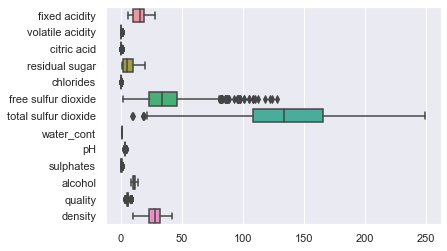

In [77]:
sns.boxplot(data = df_clean, orient = 'h')

# Feature Selection

## Checking correlation

In [78]:
df_clean.corr()['density'].sort_values(ascending=False).head(3)

density          1.000000
quality          0.951474
fixed acidity    0.921073
Name: density, dtype: float64

<AxesSubplot:>

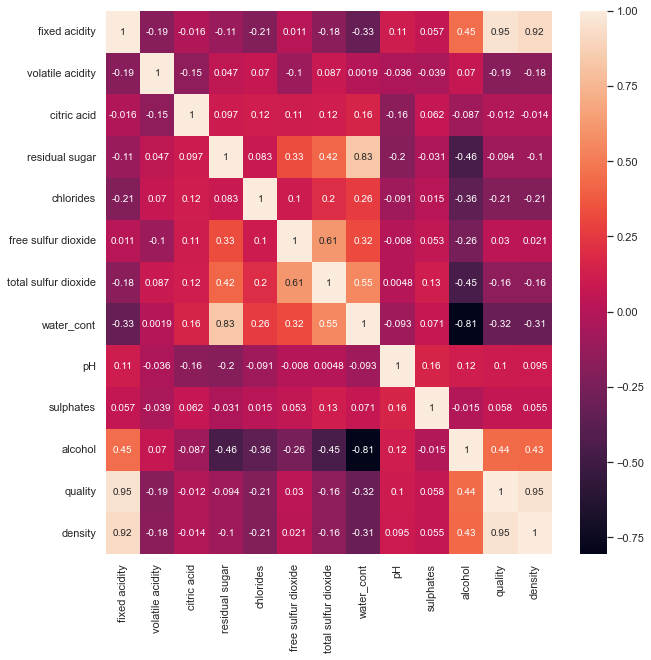

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df_clean.corr(), annot=True)

## checking linear relation

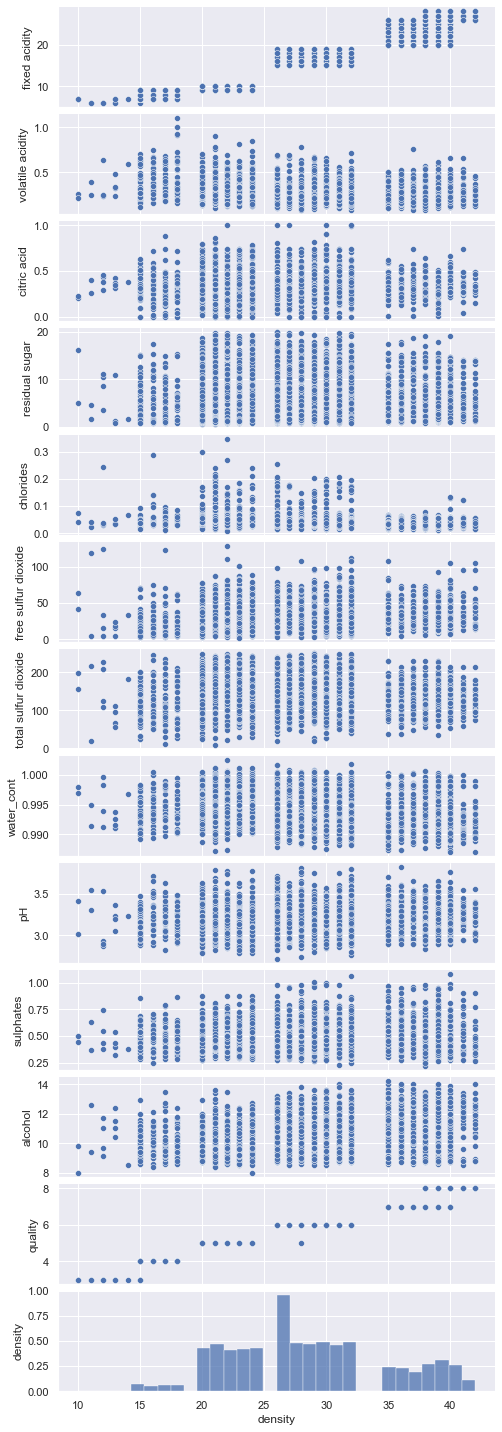

In [80]:
g = sns.pairplot(df_clean, y_vars= df_clean.columns.values, x_vars='density')
g.fig.set_size_inches(10,20)

<span style='background-color:#dcffe4'>  <strong> quality, fixed acidity hightly related with density </strong></span>

In [349]:
X.skew()

fixed acidity    0.210254
quality          0.129740
dtype: float64

In [350]:
y.skew()

0.19579201103134902

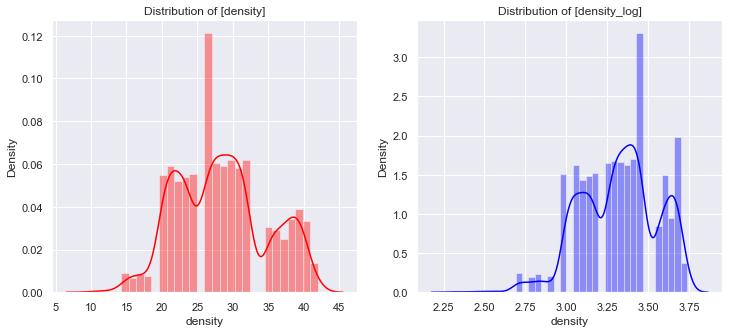

In [352]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
sns.distplot(df_clean['density'],color='red',ax=ax)
ax.set_title('Distribution of [density]')

ax=f.add_subplot(122)
sns.distplot(np.log(df_clean['density']),color='blue',ax=ax)
ax.set_title('Distribution of [density_log]');


# plt.figure(figsize=(5,5))
# sns.displot(df['density'], kde=True)

# Building SVM-R

In [81]:
import sys
sys.path.insert(0, './_functions_')

from fx_MLRegression import *

### Define the label and features

In [82]:
X = df_clean[['fixed acidity','quality']]
y =df_clean['density']

In [83]:
X.head(3)

,fixed acidity,quality
0,7.02,3
1,6.02,3
2,7.02,3


In [84]:
y.head(3)

0    10
1    12
2    14
Name: density, dtype: int64

### Scaling

In [85]:
# Scaling library 
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler 

In [86]:
col_name = ['fixed acidity','quality']

In [87]:
# Mscaler = MinMaxScaler()
# Mscaled_df = Mscaler.fit_transform(X)
# Mscaled_df = pd.DataFrame(Mscaled_df, columns= col_name)
# Mscaled_df.tail(2)

In [88]:
# Rscaler = RobustScaler()
# Rscaled_df = Rscaler.fit_transform(X)
# Rscaled_df = pd.DataFrame(Rscaled_df, columns= col_name)
# Rscaled_df.tail(3)

In [89]:
Sscaler = StandardScaler()
Sscaler_df = Sscaler.fit_transform(X)
Sscaler_df = pd.DataFrame(Sscaler_df, columns= col_name)
Sscaler_df.tail(3)

,fixed acidity,quality
4789,2.018407,2.407689
4790,2.200595,2.407689
4791,1.836218,2.407689


In [90]:
X_c = Sscaler_df.copy()

In [91]:
X_c

,fixed acidity,quality
0,-1.625363,-3.283731
1,-1.807552,-3.283731
2,-1.625363,-3.283731
3,-1.625363,-3.283731
4,-1.807552,-3.283731
...,...,...
4787,2.200595,2.407689
4788,2.018407,2.407689
4789,2.018407,2.407689
4790,2.200595,2.407689


### Split the data into train and test set

In [92]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_c, y, 
                                                    test_size=0.3,
                                                    random_state=5)

### Model Comparison

<strong> Model 1 : Applied Ridge model  </strong> 

In [95]:
regr_cv = RidgeCV(alphas = [0.001, 0.1, 0.5, 1.0, 5.0, 10., 100.])
model_cv = regr_cv.fit(X_train, y_train)
model_cv.alpha_ # the best alpha value

1.0

In [96]:
rr = Ridge(alpha=1.0)
rr.fit(X_train, y_train)

Ridge()

In [101]:
y_pred = rr.predict(X_test)
y_pred

array([16.04651804, 29.3017464 , 36.63559985, ..., 28.89818109,
       29.3017464 , 29.3017464 ])

In [100]:
Allmetrics(rr, X_train, y_train, X_test, y_test)

,MAE,MSE,RMSE,R2,CV_R2
Train,1.619236,3.741552,1.934309,0.908339,0.908
Test,1.637778,3.756975,1.938292,0.907372,NaN


<strong> Model 2 : Only SVM Model application </strong> 

In [54]:
# from sklearn.model_selection import GridSearchCV # 하이퍼 튜닝용

# param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], # 6 val
#               'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], # 7 values
#               'kernel': ['linear', 'rdf','poly']} # 3 values

# param_grid # comnibations 126 models

{'C': [0.01, 0.1, 0.5, 1, 10, 100],
 'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
 'kernel': ['linear', 'rdf', 'poly']}

In [93]:
# grid = GridSearchCV(SVR(), param_grid,scoring='r2',
#                     cv=10, n_jobs = -1)
# # n_jobs = -1: paralell computing
# print(grid)

In [ ]:
# import time
# start = time.time() #10:15

# grid_model = grid.fit(X_train, y_train)

# end = time.time() #GridSearchCV 연산이 끝나는 타임 예를 들어 10:20 
# print('Total execution time:', end - start, 'sec') # 5 mins taken

In [ ]:
# grid_model

In [ ]:
# grid_model.best_params_ #

In [ ]:
# grid_model.best_score_

In [94]:
final_model = SVR(C =0.5, gamma=  1, kernel= 'linear') #결과 나오면 고쳐야 함
final_model.fit(X_train,y_train) # train 
Allmetrics(final_model, X_train, y_train, X_test, y_test) # performance check

,MAE,MSE,RMSE,R2,CV_R2
Train,1.620294,3.745836,1.935416,0.908234,0.907
Test,1.637123,3.764858,1.940324,0.907178,NaN


# ---------------------------------------------

------------------ Data Transformation

Encoding the categorical variables is not required

---------------Considering to deal with Skewness

In [353]:
y=np.log(df_clean['density']) #
y

0       2.302585
1       2.484907
2       2.639057
3       2.564949
4       2.397895
          ...   
4888    3.737670
4889    3.663562
4890    3.663562
4891    3.688879
4892    3.713572
Name: density, Length: 4792, dtype: float64

# Initializing and fitting the model

## Model 2

In [375]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr

LinearRegression()

In [378]:
print('Slope of the Linear model         :', lr.coef_)
print('Intercept of the Linear model     :', lr.intercept_)

Slope of the Linear model         : [0.07234501 1.14618748]
Intercept of the Linear model     : 2.628164827752749


In [380]:
y_pred = lr.predict(X_test)
y_pred

array([3.09979346, 3.09979346, 3.35862664, ..., 3.60430619, 3.35204982,
       3.59772937])

In [239]:
# Exercise 2. What happens to the model if we transform the data? (MinMax Scaler, Standardize...)
# Try to transform the raw data, repeat the model building and extract some conclusions 

In [84]:
# mapping 
my_map = {'남':'M','여':'F'}
temp = {'A':['남', '여'], 'B':['남', '여']}

test = pd.DataFrame(temp)

for i in test:
    test[i]=test[i].map(my_map)

# lambda 함수 

# list comprehension
# mylist = [1,2,3,4,5,6,7]
# even = []
# even = [i for i in mylist if i%2==0]
# even

<function __main__.<lambda>(x)>

1. Selecting target and features 
2. spliting data and traing
3. initialize the model 
4. train 
5. evaluate